In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
os.chdir("/Users/etmu9498/research/data/in-situ-new")


In [24]:
os.chdir("/Users/etmu9498/research/data/in-situ-new")

data = xr.open_dataset('in-situ-grace-08-16-eye-1.nc')
# data = xr.open_dataset('in-situ-sam-09-27-eye-2.nc')

print( len( data.time))
print( len( data['PSURF.d']))

print( type( data.time[ 1000].values))
print( data.time[ 1000].values)

print( type( data['PSURF.d'][ 1000].values))
print( data['PSURF.d'][ 1000].values)

32768
32768
<class 'numpy.ndarray'>
6.531666666666666
<class 'numpy.ndarray'>
1014.40


In [25]:
def in_situ_to_float( return_var):
    return_var_temp = np.zeros( len( return_var))
    for line_ind in range( len( return_var)):
        if return_var[ line_ind] == '':
            return_var_temp[line_ind] = np.nan
        else:
            return_var_temp[ line_ind] = float( return_var[ line_ind])

    return return_var_temp

time converted
psurf converted


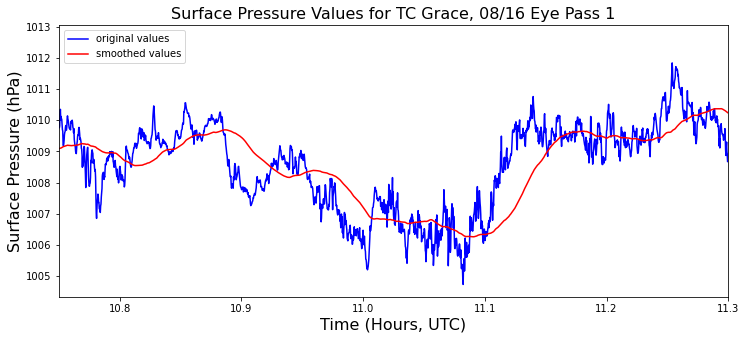

In [26]:
lim1 = 15000 # 15000
lim2 = 20000 # 17500
window = 180 # 30 in seconds
fs = 16

time = in_situ_to_float( data.time[lim1 : lim2])
print('time converted')

psurf = in_situ_to_float( data['PSURF.d'][lim1 : lim2])

psurf_avg = pd.Series( psurf).rolling(window=window, min_periods=1).mean()
# psurf_avg = pd.Series( psurf).ewm(span=window).mean()
print('psurf converted')

plt.figure(figsize=(12, 5))
plt.plot( time, psurf, c='b', label='original values')
plt.plot( time, psurf_avg, c='r', label='smoothed values')
plt.legend()

# plt.title( "Surface Pressure Values for TC Sam, 09/27 Eye Pass 2", fontsize=fs)
# plt.xlim([23.0, 23.6])

plt.xlim( [10.75, 11.3])
plt.title( "Surface Pressure Values for TC Grace, 08/16 Eye Pass 1", fontsize=fs)

plt.xlabel( 'Time (Hours, UTC)', fontsize=fs)
plt.ylabel( 'Surface Pressure (hPa)', fontsize=fs)

plt.show()
